## NAME: AUBREY UNDI PHIRI
## COUSRE: TOPOLOGICAL DATA ANALYSIS
## TASK: TRIANGULATION AND CONNECTED COMPONENTS
### DATE: 2024/1/17

























### MAIN INSTALLATION NEEDED




If not installed, two important libraries to install are gudhi and Nextworkx, UNCOMMENT the lines of code below and run to install.



GUDHI (GUDHI stands for Geometry Understanding in Higher Dimensions) is a Python library that provides data structures and algorithms for computational topology.


Networkx is primarily used for visualizing the 1-skeleton of a simplicial complex. The 1-skeleton is essentially a graph representation of the complex, containing only the vertices and edges, more specificaly, it is used in manipulation, and study of complex networks and graphs




In [3]:
! pip install gudhi
!pip install networkx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 39.5 MB/s eta 0:00:00


##### Import libraries and packages to proceed with the notebook


In [4]:
import gudhi
import numpy as np
import networkx as nx

## The Functions below will be called to:

### PrintSimplices:
Prints a list of all simplices $(\sigma_n$ (vertices, edges, triangles, etc.)) in a simplicial complex.

$$
K = \{ \sigma_1, \sigma_2, \dots, \sigma_n \}
$$

- $(K)$: The simplicial complex.
- $\sigma_n$: The simplices in the simplicial complex (vertices, edges, triangles, etc.).

---

### DrawSimplicialComplex:
Visualizes the 1-skeleton (vertices and edges) of a simplicial complex as a graph.

$$
K_{(n)} = \{ \sigma \in K \mid \dim(\sigma) \leq 1 \}
$$

- $K_{(n)}$: The 1-skeleton of the simplicial complex.
- $ \sigma \in K $ : Simplices that belong to the simplicial complex $K.$
- $\dim(\sigma) \leq 1$: Dimension of simplices that are 1 or lower (vertices and edges).

---

### NumberOfConnectedComponents:
Determine the number of connected components.

$$
\beta_0(K) = \text{rank}(H_0(K))
$$

- $\beta_0(K)$: The zeroth Betti number, representing the number of connected components in $K$.

- $\text{rank}(H_0(K))$: The rank of the zeroth homology group of $K$, which counts the connected components.

---

### EulerCharacteristic:
Calculate the Euler characteristic.

$$
\chi(K) = \sum_{i=0}^{\dim(K)} (-1)^i c_i
$$

- $\chi(K)$: The Euler characteristic of the simplicial complex $(K)$.
- $c_i$: The number of $(i)$-dimensional simplices in $(K)$.


In [6]:
def PrintSimplices(simpcomplex):
    '''
    Print a list of the simplices of the simplicial complex 'simpcomplex'.

    Input:
        simpcomplex: a gudhi.SimplexTree

    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        PrintSimplices(simpcomplex)
    '''
    simplices = {i:[] for i in range(simpcomplex.dimension()+1)}
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        simplices[len(simplex)-1].append(simplex)
    print('The simplicial complex contains the following simplices: ')
    for i in range(simpcomplex.dimension()+1):
        print('Dimension '+repr(i)+': ', end="")
        print(*simplices[i], sep = ", ")

def DrawSimplicialComplex(simpcomplex, pos=None):
    '''
    Draw the 1-skeleton of the simplicial complex 'simpcomplex', in the plane.
    If 'pos==None', the position of the vertices are chosen at random, according to the 'spring_layout' of networkx.
    If pos is a dict

    Input:
        simpcomplex: a gudhi.SimplexTree
        pos: a dict {(vertex of simpcomplex): (list of floats of length 2) }

    Example 1:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        DrawSimplicialComplex(simpcomplex)

    Example 2:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        pos = {0:[0,0], 1:[0,1]}
        DrawSimplicialComplex(simpcomplex, pos=pos)
    '''
    nodes=[]; edges=[]
    for filtr in simpcomplex.get_skeleton(1):
        simplex = filtr[0]
        if len(simplex)==1:
            nodes.append(simplex[0])
        if len(simplex)==2:
            edges.append(simplex)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    if pos == None:
        pos = nx.spring_layout(G)
    nx.draw(G, pos=pos, with_labels=True, font_weight='bold', node_color='magenta')

def NumberOfConnectedComponents(simpcomplex, verbose = 'True'):
    '''
    Print the number of connected components of the simplicial complex 'simpcomplex'.

    Input:
        simpcomplex: a gudhi.SimplexTree

    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        NumberOfConnectedComponents(simpcomplex)
    '''
    simpcomplex.compute_persistence()
    nbr_components = simpcomplex.betti_numbers()[0]
    if verbose: print('The simplicial complex admits '+repr(nbr_components)+' connected component(s).')
    return nbr_components

def EulerCharacteristic(simpcomplex, verbose = 'True'):
    '''
    Print the Euler characteristic of the simplicial complex 'simpcomplex'.

    Input:
        simpcomplex: a gudhi.SimplexTree

    Example:
        simpcomplex = gudhi.SimplexTree()
        simpcomplex.insert([0])
        simpcomplex.insert([1])
        EulerCharacteristic(simpcomplex)
    '''
    num_simplices = [0 for i in range(simpcomplex.dimension()+1)]
    for filtration in simpcomplex.get_simplices():
        simplex = filtration[0]
        num_simplices[len(simplex)-1]+=1
    Euler_characteristic = sum(num_simplices[::2]) - sum(num_simplices[1::2])
    if verbose: print('The simplicial complex has Euler characteristic equal to '+repr(Euler_characteristic)+'.')
    return Euler_characteristic

## Triangulation of the circle

We start by considering a simplicial complex $S$ that is a triangulation of the circle.
It is given by:
- three vertices: $0$,$1$ and $2$,
- three edges: $[0,1]$, $[1,2]$ and $[2,0]$.


In [7]:
# We build a SimplexTree structure on gudhi

simpcomplex = gudhi.SimplexTree()

print(simpcomplex)

In [8]:
# We add the vertices

simpcomplex.insert([0])
simpcomplex.insert([1])
simpcomplex.insert([2])

True

In [9]:
# Let us verify that the vertices are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]


In [10]:
# We add the edges

simpcomplex.insert([0,1])
simpcomplex.insert([1,2])
simpcomplex.insert([2,0])

True

In [11]:
# Let us verify that the edges are correctly added

PrintSimplices(simpcomplex)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


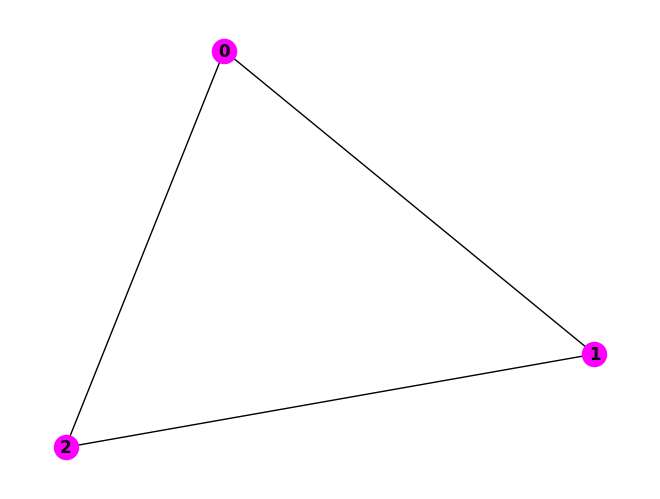

In [12]:
# The following function allows to draw the simplicial complex (uses the library networkx)

DrawSimplicialComplex(simpcomplex)

In [13]:
# In Gudhi, if a simplex is added to the complex, then all its faces are
# Hence we can use the simpler code:

simpcomplex2 = gudhi.SimplexTree()

simpcomplex2.insert([0,1])
simpcomplex2.insert([1,2])
simpcomplex2.insert([2,0])

PrintSimplices(simpcomplex2)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [14]:
# We can do it even faster, by using the remove_maximal_simplex function:

simpcomplex3 = gudhi.SimplexTree()

simpcomplex3.insert([0,1,2])
simpcomplex3.remove_maximal_simplex([0,1,2])

PrintSimplices(simpcomplex3)

The simplicial complex contains the following simplices: 
Dimension 0: [0], [1], [2]
Dimension 1: [0, 1], [0, 2], [1, 2]


In [15]:
# be careful

#simpcomplex3.remove_maximal_simplex([0])

## Computing topological invariants

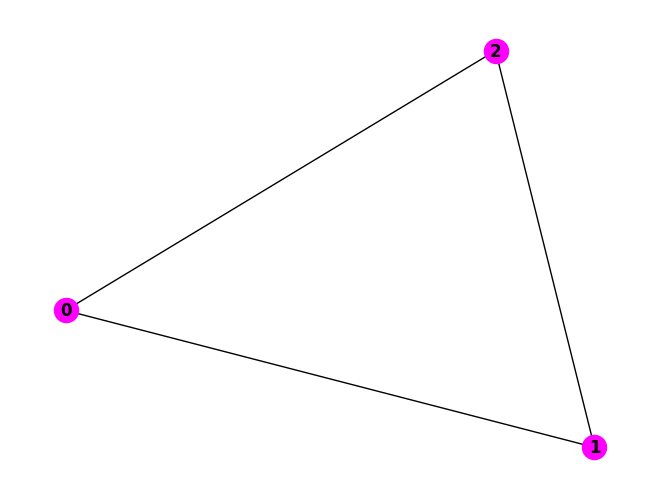

In [16]:
simpcomplexdim2 = gudhi.SimplexTree()

simpcomplexdim2.insert([0,1,2])

DrawSimplicialComplex(simpcomplexdim2)

In [17]:
# The following function returns the number of connected components of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

NumberOfConnectedComponents(simpcomplex, verbose = False)

1

In [18]:
# The following function returns the Euler characteristic of the complex.
# Use verbose = 'True' or verbose = 'False' to print the output sentence.

EulerCharacteristic(simpcomplex)

The simplicial complex has Euler characteristic equal to 0.


0

# Exercise 22

### Part 1







*Build triangulations of the alphabet letters, and compute their Euler characteristic.


This task will build traingulations of the capical letters of the alphabet.


## A B C D E F G H I J K L M N O P Q R S T U V W X Y Z






Triangulation of a letter involves representing its shape using a set of connected triangles (a simplicial complex). The vertices, edges, and triangles of these simplicial complexes allow to compute topological invariants like the Euler characteristic.

The Euler characteristic


χ can also be gotten by the formula:


χ=V-E+F


where:




V = number of vertices,


E = number of edges,


F = number of faces (triangles)


The simplicial complex has Euler characteristic equal to 0.


0

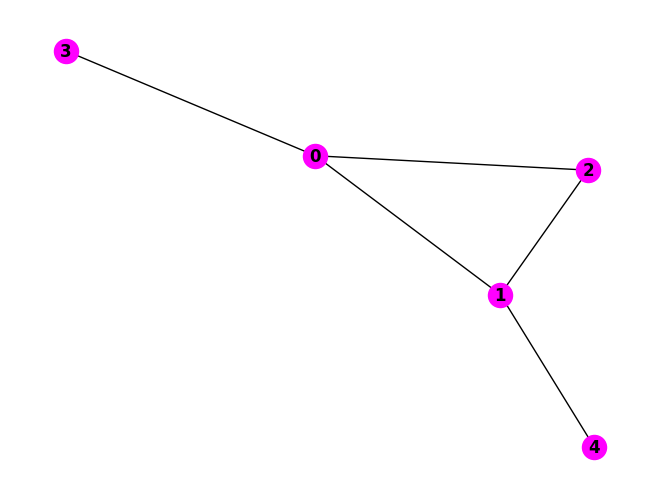

In [19]:
# Triangulation of the letter 'A'
# This triangulation represents the structure of the letter 'A' using connected edges.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'A'
# Each 'insert' adds a simplex (list of vertex indices) to the complex
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2
simpcomplex.insert([2, 0])  # Edge connecting vertex 2 to vertex 0 (forms a triangle with previous edges)
simpcomplex.insert([3, 0])  # Edge connecting vertex 3 to vertex 0 (additional structure for 'A')
simpcomplex.insert([4, 1])  # Edge connecting vertex 4 to vertex 1 (additional structure for 'A')

# At this stage, the edges form the structure of the letter 'A',
# with connected edges forming the shape.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'A' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to -1.


-1

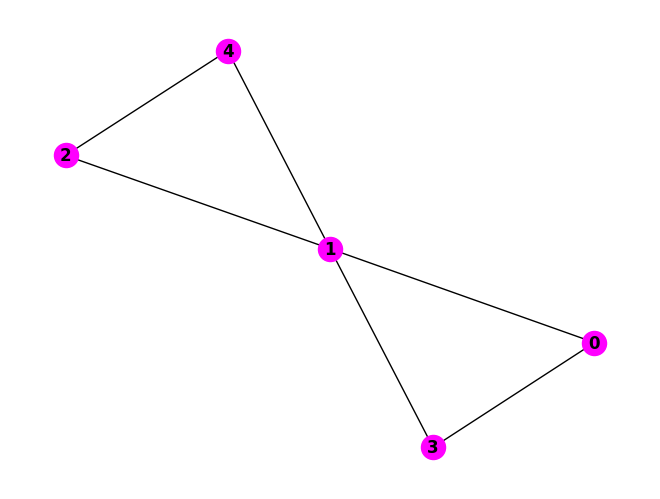

In [21]:
# Triangulation of the letter 'B'
# This triangulation represents the vertical bar and the two circular parts of the letter 'B'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'B'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (part of the backbone of B)
simpcomplex.insert([0, 3])  # Edge connecting vertex 0 to vertex 3 (upper loop connection)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (upper loop connection)
simpcomplex.insert([1, 3])  # Edge connecting vertex 1 to vertex 3 (closing the upper loop)
simpcomplex.insert([1, 4])  # Edge connecting vertex 1 to vertex 4 (lower loop connection)
simpcomplex.insert([2, 4])  # Edge connecting vertex 2 to vertex 4 (closing the lower loop)

# At this stage, the edges form the structure of the letter 'B',
# with a vertical bar and two circular parts.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'B' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

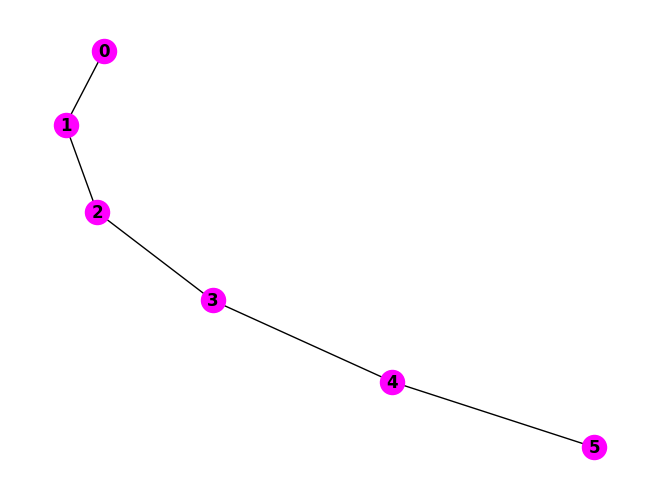

In [22]:
# Triangulation of the letter 'C'
# This triangulation represents the open structure of the letter 'C',
# using edges to form a semicircular shape.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'C'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3
simpcomplex.insert([3, 4])  # Edge connecting vertex 3 to vertex 4
simpcomplex.insert([4, 5])  # Edge connecting vertex 4 to vertex 5

# At this stage, the edges form a path representing the open curved structure of the letter 'C'.

# Visualize the simplicial complex
# This function is expected to display the semicircular structure created above.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 0.


0

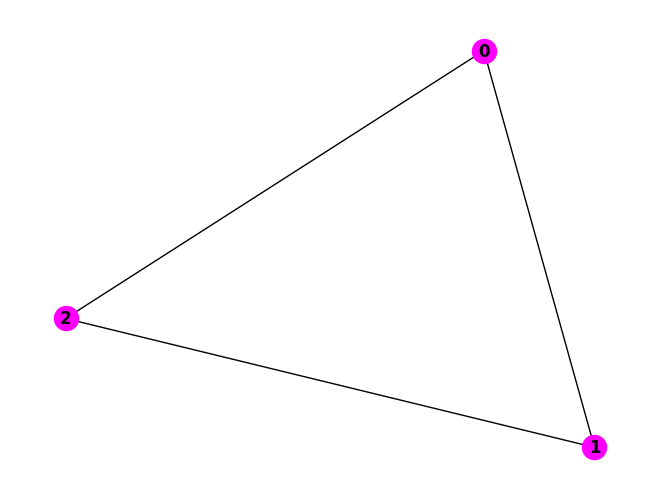

In [23]:

# Triangulation of the letter 'D'
# This triangulation represents the curved side of the letter 'D' as a single triangular face.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'D'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1
simpcomplex.insert([0, 2])  # Edge connecting vertex 0 to vertex 2
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2

# At this stage, the edges form a triangular face (2-simplex),
# representing a simplified version of the curved part of the letter 'D'.

# Visualize the simplicial complex
# This function is expected to display the triangular structure created above.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

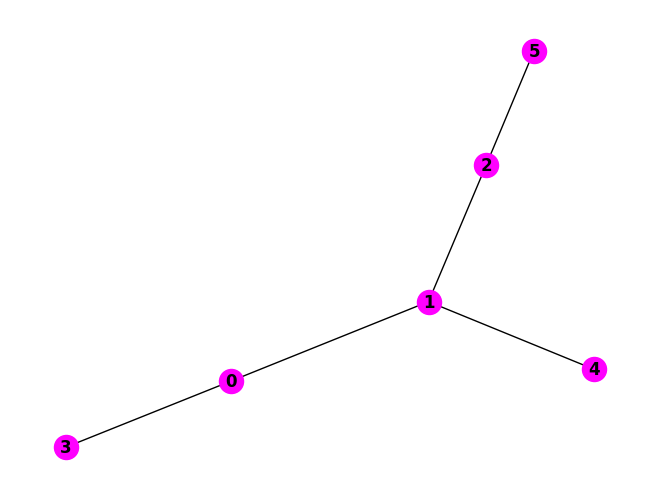

In [24]:
# Triangulation of the letter 'E'
# This triangulation represents the straight edges forming the backbone and horizontal bars of the letter 'E'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'E'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (backbone of the letter 'E')
simpcomplex.insert([0, 3])  # Edge connecting vertex 0 to vertex 3 (top horizontal bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (middle horizontal bar)
simpcomplex.insert([1, 4])  # Edge connecting vertex 1 to vertex 4 (connection to bottom bar)
simpcomplex.insert([2, 5])  # Edge connecting vertex 2 to vertex 5 (bottom horizontal bar)

# At this stage, the edges form the structure of the letter 'E',
# with a backbone and three distinct horizontal bars.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'E' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

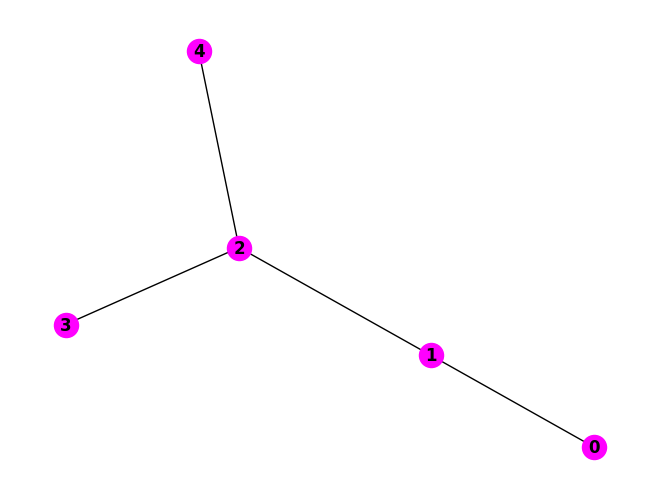

In [25]:
# Triangulation of the letter 'F'
# This triangulation represents the straight edges forming the backbone and two horizontal bars of the letter 'F'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'F'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (backbone of the letter 'F')
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (top horizontal bar)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (middle horizontal bar)
simpcomplex.insert([2, 4])  # Edge connecting vertex 2 to vertex 4 (extension of middle bar)

# At this stage, the edges form the structure of the letter 'F',
# with a backbone and two horizontal bars.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'F' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

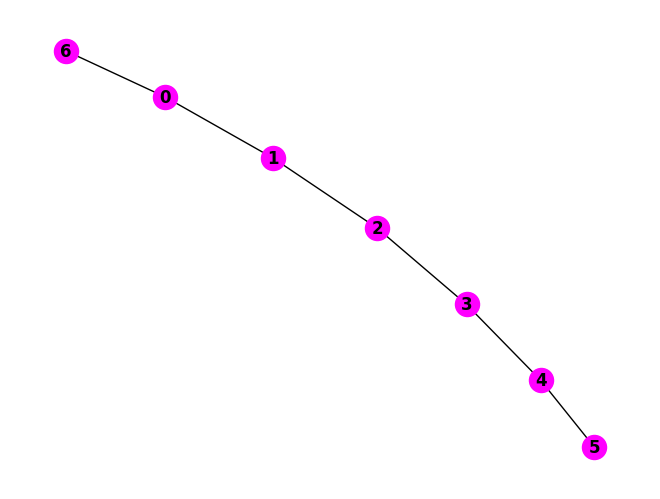

In [28]:
# Triangulation of the letter 'G'
# This triangulation represents the straight edges forming the structure of the letter 'G'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'G'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (left vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (top horizontal bar)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (right vertical bar)
simpcomplex.insert([3, 4])  # Edge connecting vertex 3 to vertex 4 (bottom horizontal bar)
simpcomplex.insert([4, 5])  # Edge connecting vertex 4 to vertex 5 (left bottom horizontal bar)
simpcomplex.insert([0, 6])  # Edge connecting vertex 5 to vertex 6 (middle horizontal bar)


# At this stage, the edges form the structure of the letter 'G',
# with vertical and horizontal bars forming its shape, and an additional edge at vertex 1.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'G' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

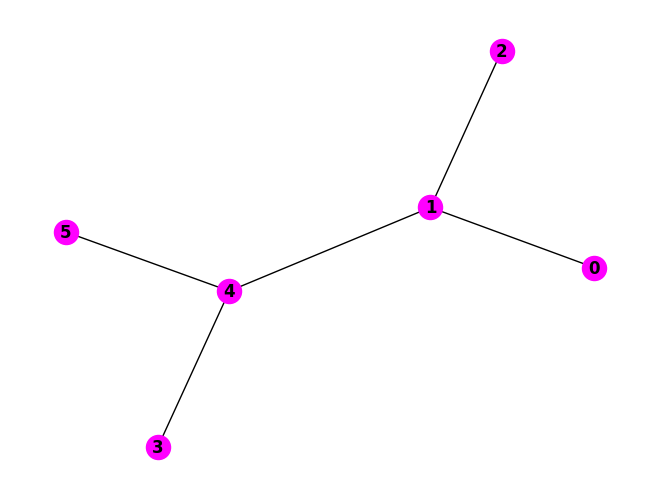

In [29]:
# Triangulation of the letter 'H'
# This triangulation represents the straight edges forming the backbone and two horizontal bars of the letter 'H'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'H'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (left vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (middle horizontal bar)
simpcomplex.insert([1, 4])  # Edge connecting vertex 1 to vertex 4 (intersection point of bars)
simpcomplex.insert([3, 4])  # Edge connecting vertex 3 to vertex 4 (right vertical bar)
simpcomplex.insert([4, 5])  # Edge connecting vertex 4 to vertex 5 (bottom horizontal bar)

# At this stage, the edges form the structure of the letter 'H',
# with two vertical bars and a connecting horizontal bar.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'H' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

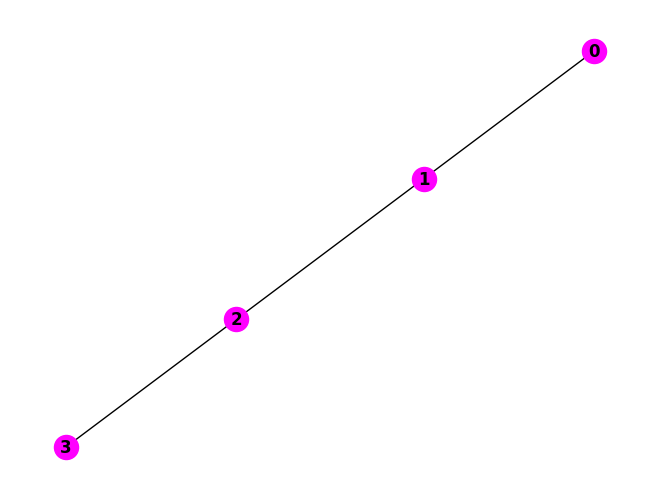

In [30]:
# Triangulation of the letter 'I'
# This triangulation represents the straight edges forming the vertical bar of the letter 'I'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'I'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (bottom part of the vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (middle part of the vertical bar)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (top part of the vertical bar)

# At this stage, the edges form the structure of the letter 'I',
# with a single vertical bar composed of three segments.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'I' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

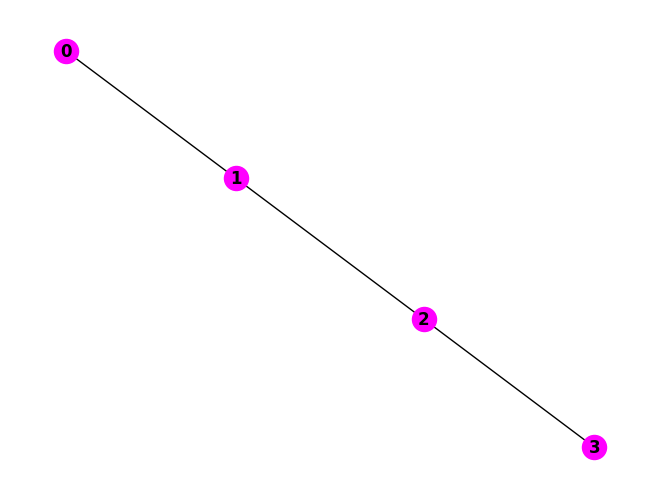

In [32]:
# Triangulation of the letter 'J'
# This triangulation represents the curved part and the vertical bar of the letter 'J'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'J'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (bottom curved part)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (middle curved part)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (top vertical bar)

# At this stage, the edges form the structure of the letter 'J',
# with a curved bottom part and a vertical bar.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'J' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

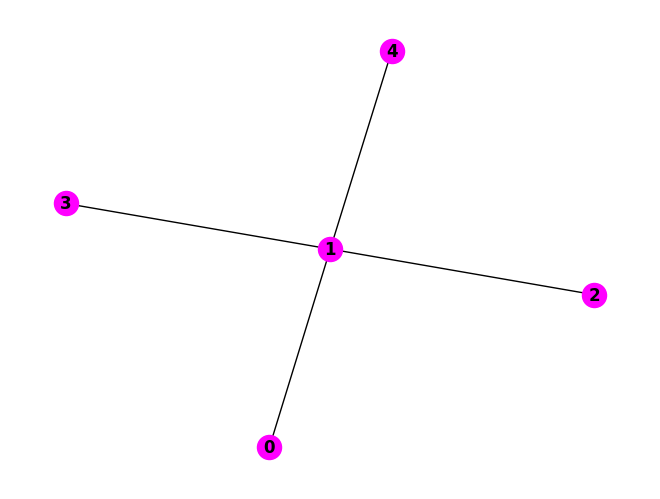

In [33]:
# Triangulation of the letter 'K'
# This triangulation represents the vertical bar and two diagonal lines of the letter 'K', with an additional edge.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'K'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (upper diagonal line)
simpcomplex.insert([1, 3])  # Edge connecting vertex 1 to vertex 3 (lower diagonal line)
simpcomplex.insert([1, 4])  # New edge connecting vertex 1 to vertex 4 (additional edge at vertex 1)

# At this stage, the edges form the structure of the letter 'K',
# with a vertical bar, two diagonal lines, and an additional edge at vertex 1.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'K' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

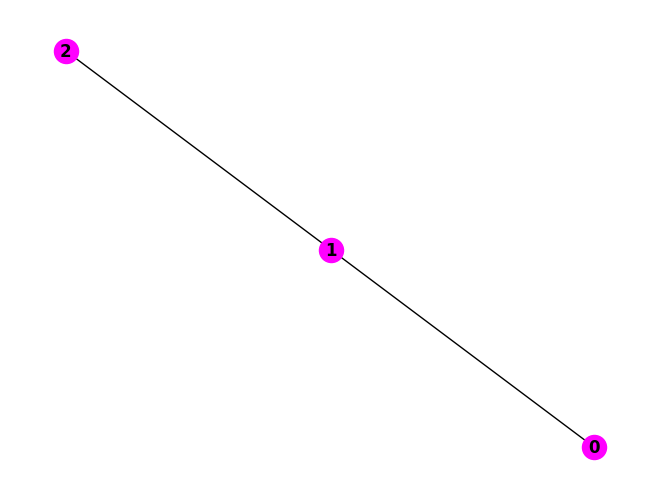

In [34]:
# Triangulation of the letter 'L'
# This triangulation represents the vertical bar and the horizontal base of the letter 'L'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'L'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (horizontal base)

# At this stage, the edges form the structure of the letter 'L',
# with a vertical bar and a horizontal base.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'L' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

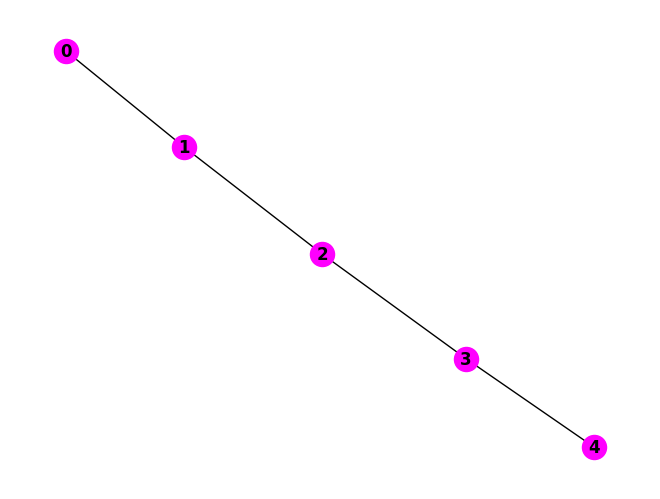

In [35]:
# Triangulation of the letter 'M'
# This triangulation represents the two vertical bars and the middle connecting diagonal lines of the letter 'M'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'M'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (left vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (bottom left diagonal line)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (top middle diagonal line)
simpcomplex.insert([3, 4])  # Edge connecting vertex 3 to vertex 4 (bottom right diagonal line)


# At this stage, the edges form the structure of the letter 'M',
# with two vertical bars and two connecting diagonal lines.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'M' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)



The simplicial complex has Euler characteristic equal to 1.


1

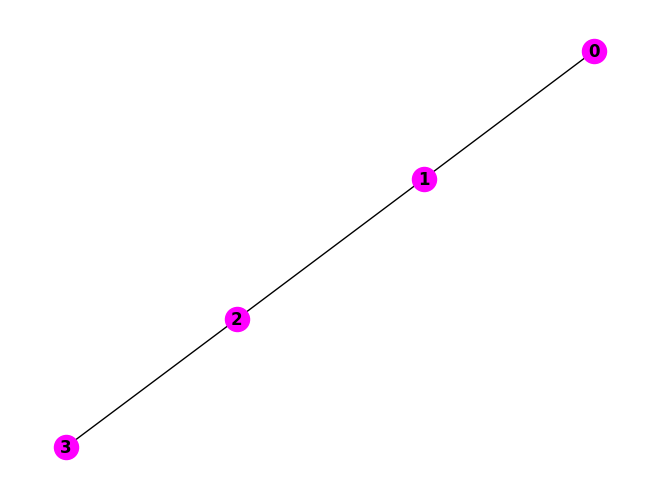

In [36]:
# Triangulation of the letter 'N'
# This triangulation represents the vertical bars and the diagonal connecting line of the letter 'N'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'N'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (left vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (diagonal connecting line)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (right vertical bar)

# At this stage, the edges form the structure of the letter 'N',
# with two vertical bars and a diagonal connecting line.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'N' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 0.


0

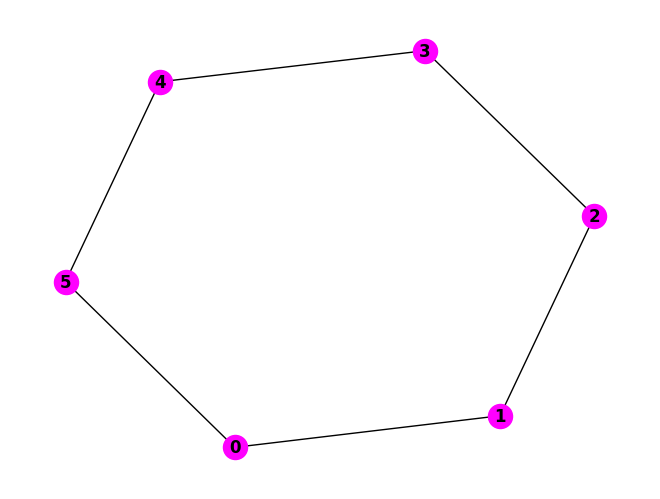

In [37]:
# Triangulation of the letter 'O'
# This triangulation represents the circular shape of the letter 'O' using a series of connected edges.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'O'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (part of the circular shape)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (part of the circular shape)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (part of the circular shape)
simpcomplex.insert([3, 4])  # Edge connecting vertex 3 to vertex 4 (part of the circular shape)
simpcomplex.insert([4, 5])  # Edge connecting vertex 4 to vertex 5 (part of the circular shape)
simpcomplex.insert([5, 0])  # Edge connecting vertex 5 to vertex 0 (completing the circular shape)

# At this stage, the edges form the structure of the letter 'O',
# with a circular shape represented by a series of connected edges.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'O' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)



The simplicial complex has Euler characteristic equal to 0.


0

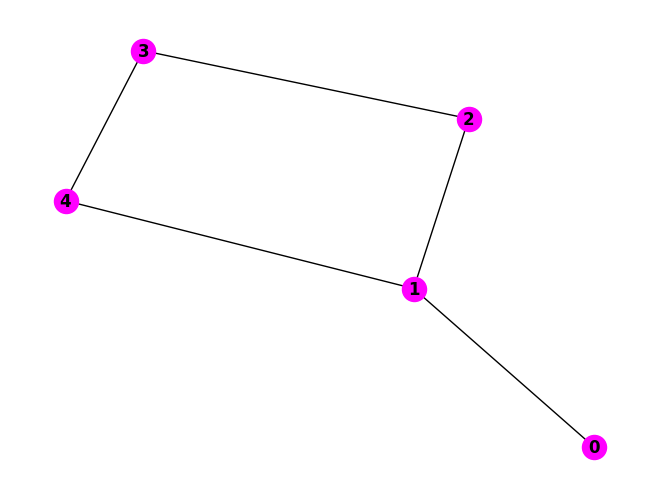

In [38]:
# Triangulation of the letter 'P'
# This triangulation represents the vertical bar and the circular part of the letter 'P'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'P'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (top horizontal bar)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (top curved part)
simpcomplex.insert([3, 4])  # Edge connecting vertex 3 to vertex 4 (bottom curved part)
simpcomplex.insert([4, 1])  # Edge connecting vertex 4 to vertex 1 (completing the circular part)

# At this stage, the edges form the structure of the letter 'P',
# with a vertical bar and a circular part forming the loop.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'P' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 0.


0

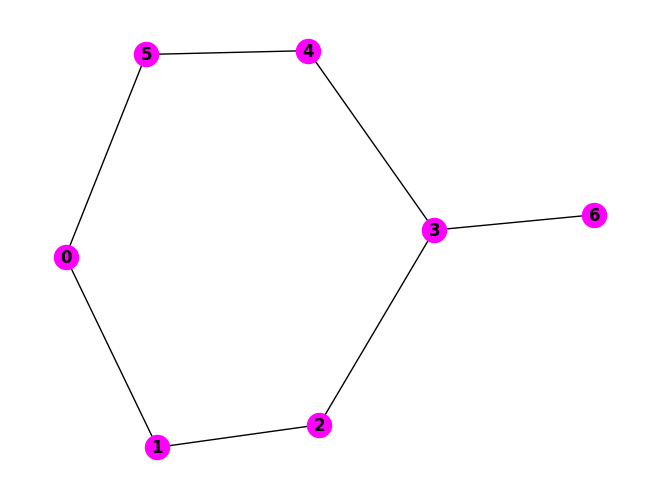

In [39]:
# Triangulation of the letter 'Q'
# This triangulation represents the circular shape of the letter 'Q' with an added diagonal line.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'Q'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (part of the circular shape)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (part of the circular shape)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (part of the circular shape)
simpcomplex.insert([3, 4])  # Edge connecting vertex 3 to vertex 4 (part of the circular shape)
simpcomplex.insert([4, 5])  # Edge connecting vertex 4 to vertex 5 (part of the circular shape)
simpcomplex.insert([5, 0])  # Edge connecting vertex 5 to vertex 0 (completing the circular shape)
simpcomplex.insert([3, 6])  # Edge connecting vertex 3 to vertex 6 (diagonal line of 'Q')

# At this stage, the edges form the structure of the letter 'Q',
# with a circular shape and an added diagonal line.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'Q' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 0.


0

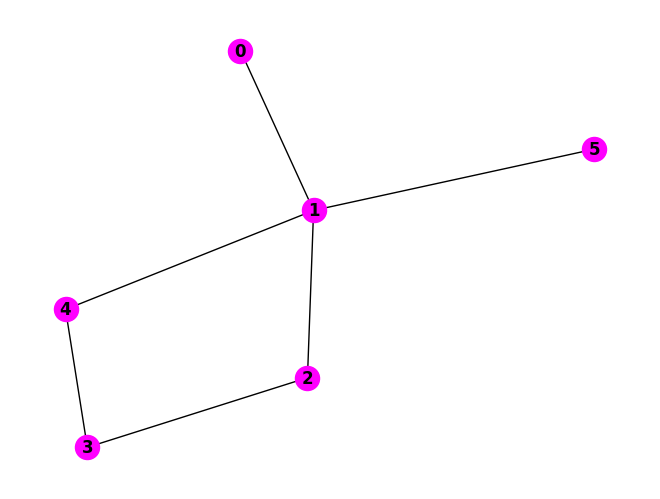

In [40]:
# Triangulation of the letter 'R'
# This triangulation represents the vertical bar, the circular part, and the diagonal leg of the letter 'R'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'R'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (top horizontal bar)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (top curved part)
simpcomplex.insert([3, 4])  # Edge connecting vertex 3 to vertex 4 (bottom curved part)
simpcomplex.insert([4, 1])  # Edge connecting vertex 4 to vertex 1 (completing the circular part)
simpcomplex.insert([1, 5])  # Edge connecting vertex 1 to vertex 5 (diagonal leg of 'R')

# At this stage, the edges form the structure of the letter 'R',
# with a vertical bar, a circular part, and a diagonal leg.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'R' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

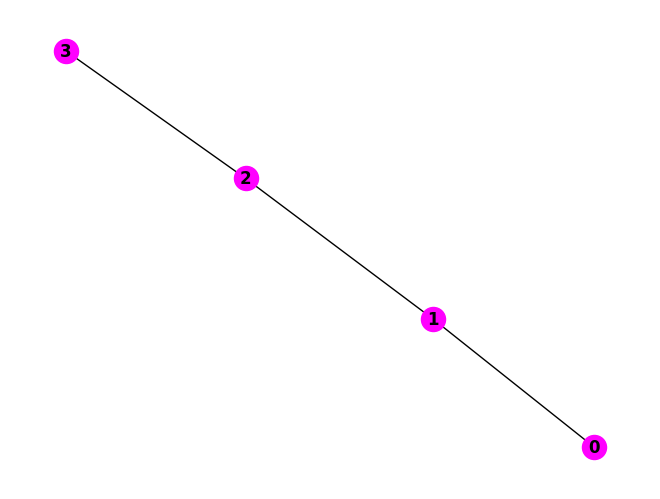

In [41]:
# Triangulation of the letter 'S'
# This triangulation represents the curved shape of the letter 'S' using a series of connected edges.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'S'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (bottom curved part)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (middle curved part)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (top curved part)

# At this stage, the edges form the structure of the letter 'S',
# with a series of connected curves.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'S' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

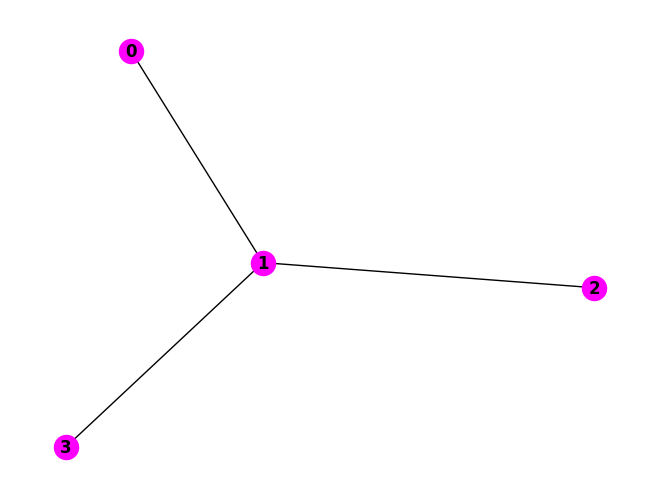

In [42]:
# Triangulation of the letter 'T'
# This triangulation represents the vertical bar and the horizontal bar of the letter 'T'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'T'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (horizontal bar)
simpcomplex.insert([1, 3])  # Edge connecting vertex 1 to vertex 3 (additional edge at vertex 1)

# At this stage, the edges form the structure of the letter 'T',
# with a vertical bar and a horizontal bar forming the top, and an additional edge at vertex 1.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'T' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

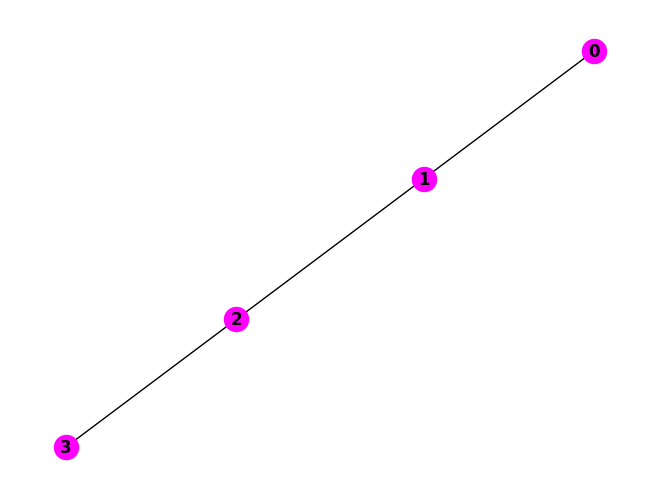

In [43]:
# Triangulation of the letter 'U'
# This triangulation represents the curved bottom and the vertical bars of the letter 'U'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'U'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (left vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (curved bottom part)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (right vertical bar)

# At this stage, the edges form the structure of the letter 'U',
# with two vertical bars and a curved bottom part.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'U' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)



The simplicial complex has Euler characteristic equal to 1.


1

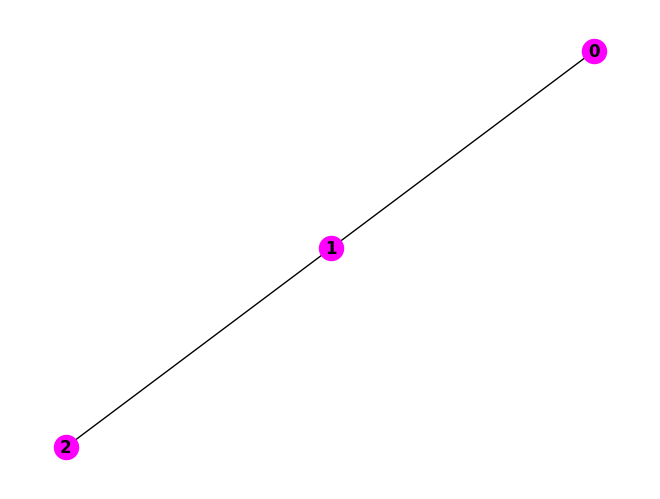

In [44]:
# Triangulation of the letter 'V'
# This triangulation represents the two diagonal lines of the letter 'V'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'V'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (left diagonal line)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (right diagonal line)

# At this stage, the edges form the structure of the letter 'V',
# with two diagonal lines meeting at a vertex.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'V' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

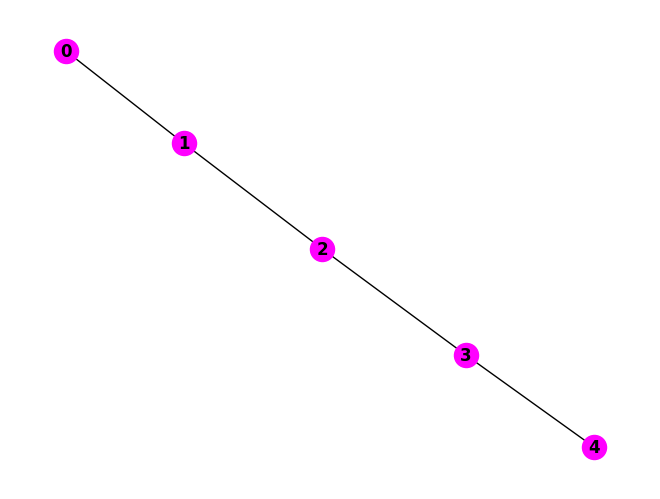

In [45]:
# Triangulation of the letter 'W'
# This triangulation represents the two downward and two upward diagonal lines of the letter 'W'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'W'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (left downward diagonal line)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (upward diagonal line)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (downward diagonal line)
simpcomplex.insert([3, 4])  # Edge connecting vertex 3 to vertex 4 (right upward diagonal line)

# At this stage, the edges form the structure of the letter 'W',
# with two downward and two upward diagonal lines meeting at vertices.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'W' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

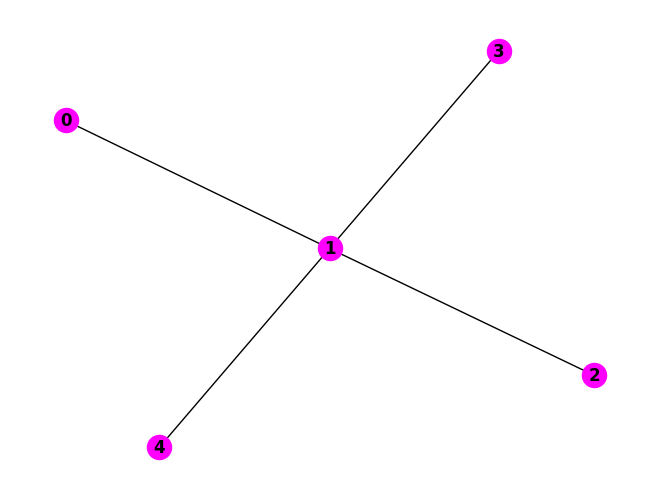

In [46]:
# Triangulation of the letter 'X'
# This triangulation represents the vertical bar and two diagonal lines of the letter 'K', with an additional edge.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'K'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (vertical bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (upper diagonal line)
simpcomplex.insert([1, 3])  # Edge connecting vertex 1 to vertex 3 (lower diagonal line)
simpcomplex.insert([1, 4])  # New edge connecting vertex 1 to vertex 4 (additional edge at vertex 1)

# At this stage, the edges form the structure of the letter 'x',
# with a vertical bar, two diagonal lines, and an additional edge at vertex 1.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'K' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

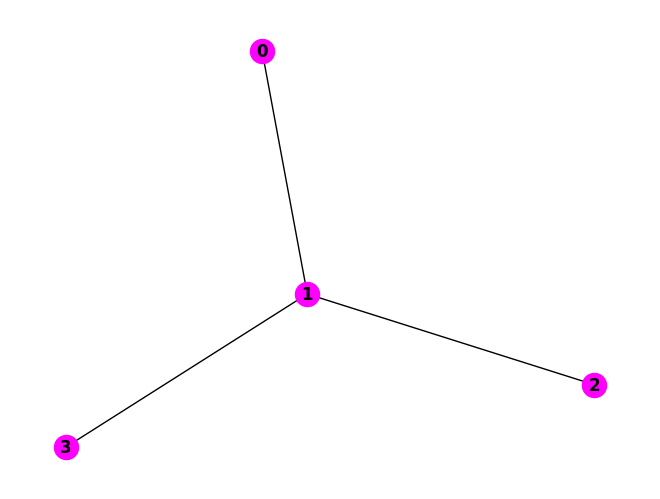

In [47]:
# Triangulation of the letter 'Y'
# This triangulation represents the two upper diagonal lines and the lower vertical line of the letter 'Y'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'Y'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (left upper diagonal line)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (right upper diagonal line)
simpcomplex.insert([1, 3])  # Edge connecting vertex 1 to vertex 3 (lower vertical line)

# At this stage, the edges form the structure of the letter 'Y',
# with two upper diagonal lines converging and a lower vertical line.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'Y' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


The simplicial complex has Euler characteristic equal to 1.


1

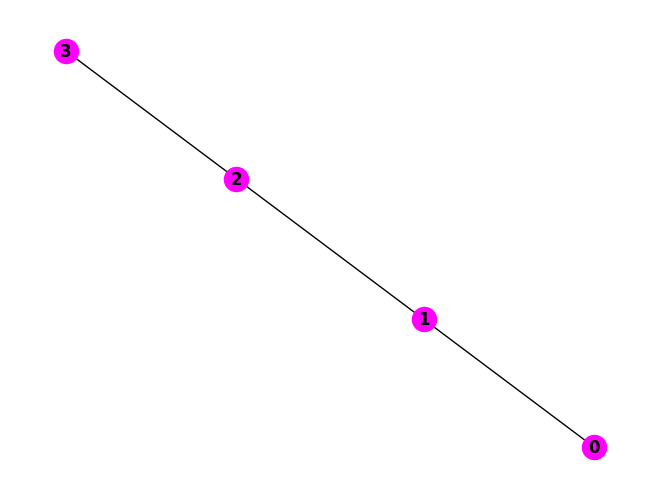

In [48]:
# Triangulation of the letter 'Z'
# This triangulation represents the top horizontal bar, the diagonal line, and the bottom horizontal bar of the letter 'Z'.

# Initialize a simplicial complex using Gudhi's SimplexTree
simpcomplex = gudhi.SimplexTree()

# Add 1-simplexes (edges) to represent the geometry of the letter 'Z'
simpcomplex.insert([0, 1])  # Edge connecting vertex 0 to vertex 1 (top horizontal bar)
simpcomplex.insert([1, 2])  # Edge connecting vertex 1 to vertex 2 (diagonal line)
simpcomplex.insert([2, 3])  # Edge connecting vertex 2 to vertex 3 (bottom horizontal bar)

# At this stage, the edges form the structure of the letter 'Z',
# with a top horizontal bar, a diagonal line, and a bottom horizontal bar.

# Visualize the simplicial complex
# This function is expected to display the structure of the letter 'Z' formed by edges.
DrawSimplicialComplex(simpcomplex)

# Compute and display the Euler characteristic
# The Euler characteristic is calculated as χ = V - E + F,
# where V is the number of vertices, E is the number of edges, and F is the number of faces.
EulerCharacteristic(simpcomplex)


# Exercise 22

### Part 2



* Given two letters that are homotopy equivalent, is it true thar their Euler characteristic are equal?


Answer:



Yes, if two topological spaces are homotopy equivalent, their Euler characteristics are equal.




Two spaces are homotopy equivalent if there exist continuous maps between them (with continuous inverses) that map one space onto the other in such a way that their topological structures are essentially the same, even if the spaces look different, for isnstance look at the letters R and A, the are homotopic equivalent and their triangulations have the same euler characteristic of zero(0)


 More formally, if \(X\) and \(Y\) are homotopy equivalent, there exist maps $(f: X \to Y)$ and $(g: Y \to X)$ such that $(f \circ g)$ is homotopic to the identity map on \(Y\), and $(g \circ f)$ is homotopic to the identity map on \(X\).




___

___


* Given two letters that are not homotopy equivalent, is it true thar their Euler characteristic are different?


Answer:

No, it is not necessarily true that two spaces that are not homotopy equivalent must have different Euler characteristics.



While the Euler characteristic is a topological invariant, it is not a complete invariant in the sense that it can distinguish all pairs of spaces. Two spaces can have the same Euler characteristic but still be non-homotopy equivalent.



For example, consider the letters "R" and "O." they both have an Euler characteristic of 0, but not homotopics.










Also on the contrary the letters A and B are not homotopic equivalent, and they also have different Euler characteristics as seen above.

# Exercise 23

For every $n$, triangulate the bouquet of $n$ circles. Compute their Euler characteristic.

The beast way to approach this question is to ask the user to make an input by runnig the code below or calling the function: $create\_circle\_bouquet()$. One thing to be noted is that as the number of circles increase, the longer it will take for the graph to load.

In [ ]:
def create_circle_bouquet():
    """
    Creates a bouquet of circles in a simplicial complex.

    This function prompts the user to input the number of circles in the bouquet,
    constructs the bouquet using Gudhi's SimplexTree, and visualizes it.

    The Euler characteristic of the bouquet is also calculated and displayed.

    Parameters:
    None

    Returns:
    None
    """
    #import gudhi  #make sure the cell for the gudhi is imported

    # Prompt user for the number of circles
    n = int(input("Enter the number of circles in the bouquet: "))

    # Initialize a simplicial complex using Gudhi's SimplexTree
    sc = gudhi.SimplexTree()

    # Insert the central vertex
    sc.insert([0])

    # Add 1-simplexes (edges) to create the circles in the bouquet
    for i in range(n):
        sc.insert([0, 2 * i + 1])  # Edge connecting central vertex to the first vertex of the circle
        sc.insert([0, 2 * i + 2])  # Edge connecting central vertex to the second vertex of the circle
        sc.insert([2 * i + 1, 2 * i + 2])  # Edge connecting the two vertices of the circle

    # Visualize the simplicial complex
    DrawSimplicialComplex(sc)

    # Display the number of circles
    print('N is equal to ' + repr(n))

    # Compute and display the Euler characteristic
    EulerCharacteristic(sc)


create_circle_bouquet()



### OBSERVATIONS


Increasing the number of circles in the bouquet leads to a more complex simplicial complex with a denser visual representation. The Euler characteristic value is dependent on structure, and it changes linearly with the number of circles.

While gudhi is designed to handle complex shapes, it has to be kept in mind that very large numbers of circles could impact the visualization clarity and increase processing time as seen below for 500 circles.
.

Enter the number of circles in the bouquet: 500
N is equal to 500
The simplicial complex has Euler characteristic equal to -499.


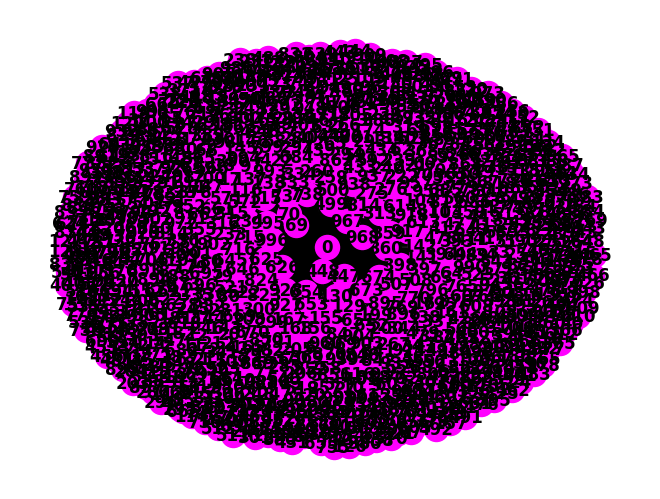

In [ ]:
#create_circle_bouquet()

### Below is a display for 0 to 6 circles, the user can try out different circles for themselves by calling the function: $create\_circle\_bouquet()$


Enter the number of circles in the bouquet: 0
N is equal to 0
The simplicial complex has Euler characteristic equal to 1.


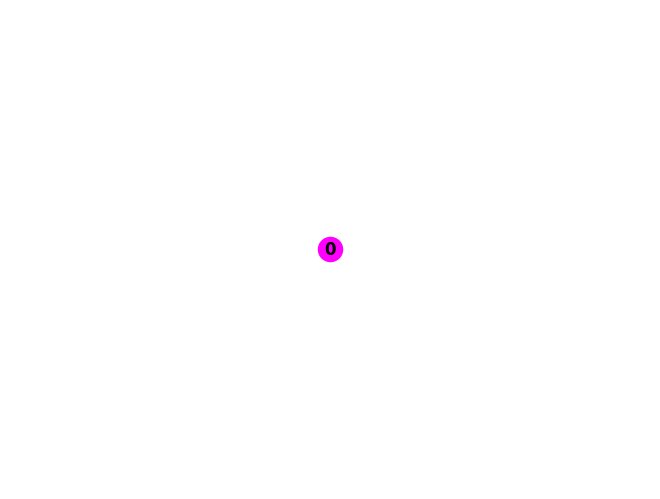

In [ ]:
#create_circle_bouquet()

Enter the number of circles in the bouquet: 1
N is equal to 1
The simplicial complex has Euler characteristic equal to 0.


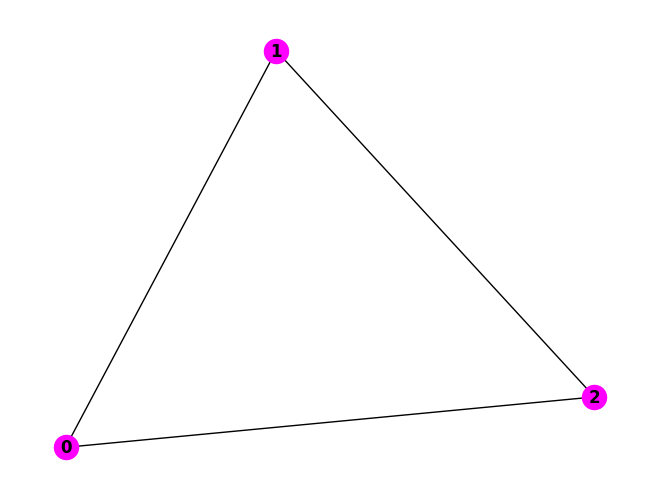

In [ ]:
#create_circle_bouquet()

Enter the number of circles in the bouquet: 2
N is equal to 2
The simplicial complex has Euler characteristic equal to -1.


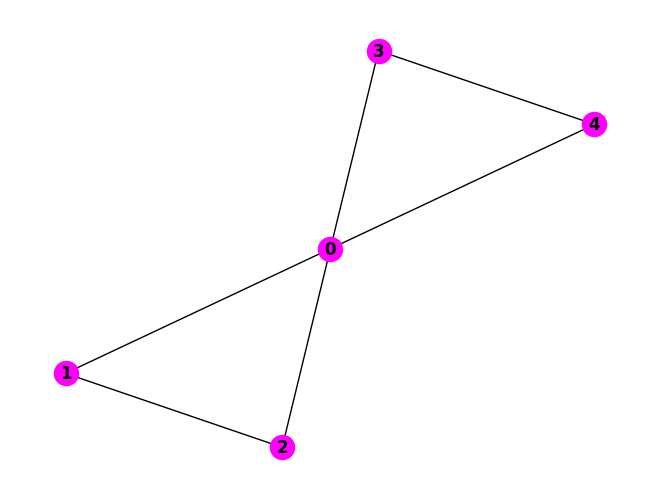

In [ ]:
#create_circle_bouquet()

Enter the number of circles in the bouquet: 3
N is equal to 3
The simplicial complex has Euler characteristic equal to -2.


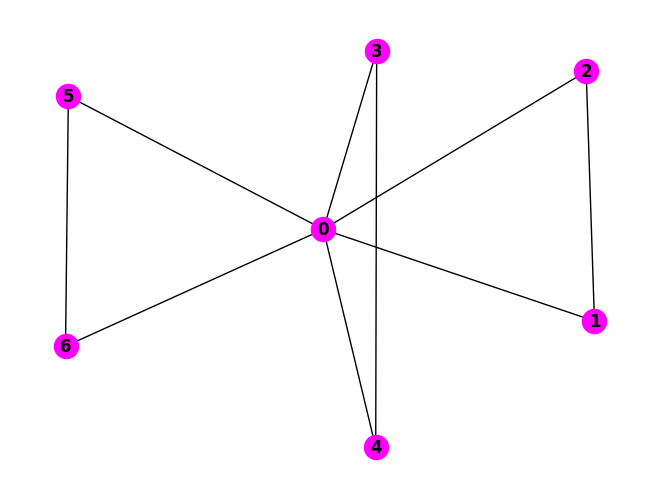

In [ ]:
#create_circle_bouquet()

Enter the number of circles in the bouquet: 4
N is equal to 4
The simplicial complex has Euler characteristic equal to -3.


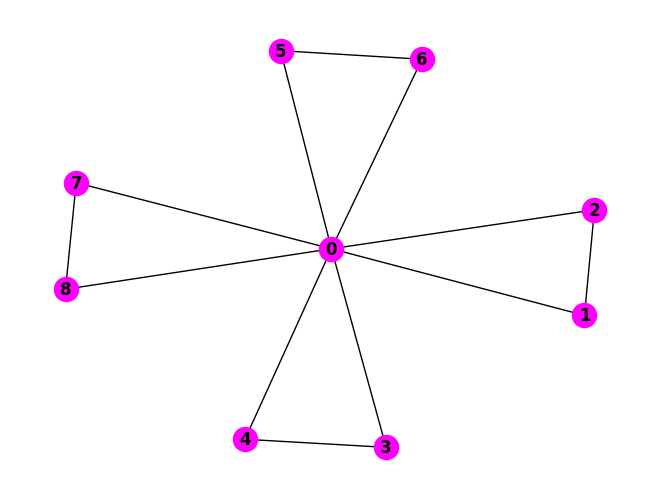

In [ ]:
#create_circle_bouquet()

Enter the number of circles in the bouquet: 5
N is equal to 5
The simplicial complex has Euler characteristic equal to -4.


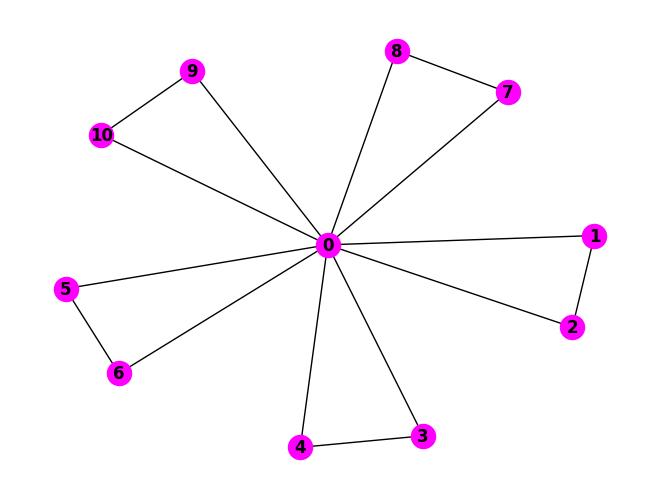

In [ ]:
#create_circle_bouquet()

Enter the number of circles in the bouquet: 6
N is equal to 6
The simplicial complex has Euler characteristic equal to -5.


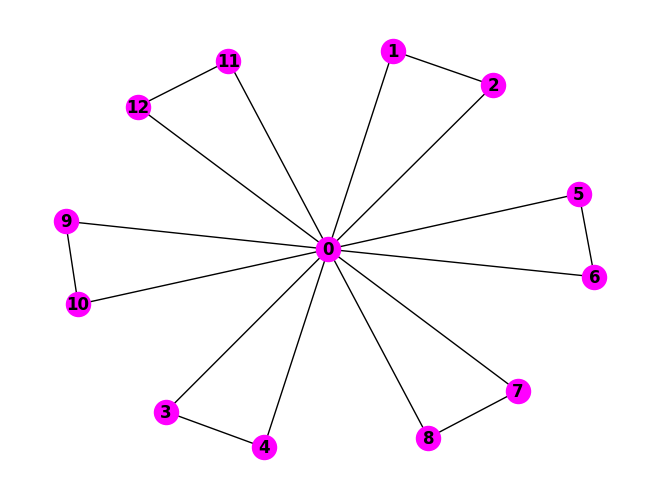

In [ ]:
#create_circle_bouquet()

# Exercise 24

Implement the triangulation of the torus given in the notes.
Compute its Euler characteristic.

The simplicial complex has Euler characteristic equal to 0.


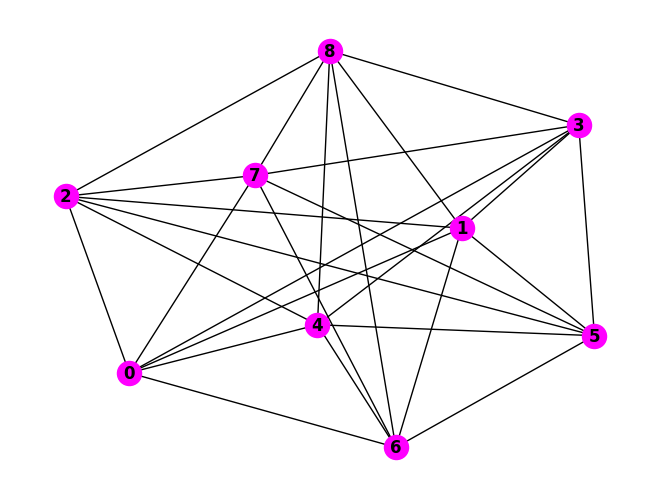

In [50]:
torus = gudhi.SimplexTree()

torus.insert([0,3,7])
torus.insert([0,2,7])
torus.insert([2,7,5])
torus.insert([2,1,5])
torus.insert([1,5,3])
torus.insert([0,1,3])

torus.insert([3,4,8])
torus.insert([3,7,8])
torus.insert([7,8,6])
torus.insert([7,5,6])
torus.insert([5,6,4])
torus.insert([5,4,3])

torus.insert([4,0,2])
torus.insert([4,2,8])
torus.insert([8,2,1])
torus.insert([8,1,6])
torus.insert([6,1,0])
torus.insert([6,4,0])

EulerCharacteristic(torus)

DrawSimplicialComplex(torus)

# Exercise 25

Consider the following dataset of $30$ points $x_0, ..., x_{29}$ in $\mathbb{R}^2$:
 ```
 {0: [0.29409772548731694, 0.6646626625013836],
 1: [0.01625840776679577, 0.1676405753593595],
 2: [0.15988905150272759, 0.6411323760808338],
 3: [0.9073191075894482, -0.16417982219713312],
 4: [-0.18661467838673884, 0.31618948583046413],
 5: [-0.3664040542098381, 0.9098590694955988],
 6: [-0.43753448716144905, -0.8820102274699417],
 7: [0.4096730199915961, -0.23801426675264126],
 8: [0.5903822103474676, -0.7285102954232894],
 9: [0.9133851839417766, -0.6606557328320093],
 10: [-0.15516122940597588, 0.7565411235103017],
 11: [-0.38626186295039866, -0.3662321656058476],
 12: [0.005209710070218199, 0.27655964872153116],
 13: [0.670078068894711, -0.00932202688834849],
 14: [-0.011268465716772091, 0.24340880308017376],
 15: [-0.6441978411451603, -0.9672635759413206],
 16: [-0.2841794022401025, -0.6734801188906114],
 17: [-0.15473260248990717, -0.1365357396855129],
 18: [0.7177096105982121, 0.9378197891592468],
 19: [-0.4677068504994166, 0.1533930130294956],
 20: [-0.32379909116817096, 0.9694800649768063],
 21: [-0.2886940472879451, -0.039544695812395725],
 22: [-0.5900701743351606, 0.8350804500575086],
 23: [0.14931959728335853, 0.869106793774487],
 24: [-0.14500672678238824, -0.3170082291070364],
 25: [0.07324547392476122, 0.6653572287065117],
 26: [-0.662990048258566, 0.1908198608241125],
 27: [-0.25641262456436276, -0.9844196180941553],
 28: [-0.5105685407819842, -0.4236604017060557],
 29: [0.6792549581008038, -0.026215820387260003]}
 ```

 Write a function that takes as an input a parameter $r\geq 0$, and returns the simplicial complex $\mathcal{G}(r)$ defined as follows:
- the vertices of $\mathcal{G}(r)$ are the points $x_0, ..., x_{29}$,
- for all $i, j \in [0,29]$ with $i\neq j$, the edge $[i,j]$ belongs to $\mathcal{G}(r)$ if and only if $||x_i-x_j||\leq r$.

Compute the number of connected components of $\mathcal{G}(r)$ for several values of $r$. What do you observe?

In [51]:
pos = {
    0: [0.29409772548731694, 0.6646626625013836],
    1: [0.01625840776679577, 0.1676405753593595],
    2: [0.15988905150272759, 0.6411323760808338],
    3: [0.9073191075894482, -0.16417982219713312],
    4: [-0.18661467838673884, 0.31618948583046413],
    5: [-0.3664040542098381, 0.9098590694955988],
    6: [-0.43753448716144905, -0.8820102274699417],
    7: [0.4096730199915961, -0.23801426675264126],
    8: [0.5903822103474676, -0.7285102954232894],
    9: [0.9133851839417766, -0.6606557328320093],
    10: [-0.15516122940597588, 0.7565411235103017],
    11: [-0.38626186295039866, -0.3662321656058476],
    12: [0.005209710070218199, 0.27655964872153116],
    13: [0.670078068894711, -0.00932202688834849],
    14: [-0.011268465716772091, 0.24340880308017376],
    15: [-0.6441978411451603, -0.9672635759413206],
    16: [-0.2841794022401025, -0.6734801188906114],
    17: [-0.15473260248990717, -0.1365357396855129],
    18: [0.7177096105982121, 0.9378197891592468],
    19: [-0.4677068504994166, 0.1533930130294956],
    20: [-0.32379909116817096, 0.9694800649768063],
    21: [-0.2886940472879451, -0.039544695812395725],
    22: [-0.5900701743351606, 0.8350804500575086],
    23: [0.14931959728335853, 0.869106793774487],
    24: [-0.14500672678238824, -0.3170082291070364],
    25: [0.07324547392476122, 0.6653572287065117],
    26: [-0.662990048258566, 0.1908198608241125],
    27: [-0.25641262456436276, -0.9844196180941553],
    28: [-0.5105685407819842, -0.4236604017060557],
    29: [0.6792549581008038, -0.026215820387260003]
}

In [52]:


def GraphExercise25(r, pos):
    """
    Constructs a graph with 30 vertices and edges based on the Euclidean distance.

    The function initializes a simplicial complex, adds 30 vertices,
    and then adds edges between pairs of vertices whose Euclidean distance
    is less than or equal to the specified radius r. The graph is then visualized,
    and the number of connected components is displayed.

    Parameters:
    r (float): The radius within which edges are added between vertices.
    pos (list of tuples): A list containing the (x, y) coordinates of the vertices.

    Returns:
    None
    """
    # Initialize a simplicial complex using Gudhi's SimplexTree
    s = gudhi.SimplexTree()

    # Add 30 vertices to the simplicial complex
    for i in range(30):
        s.insert([i])

    # Add edges based on the Euclidean distance between vertices
    for i in range(30):
        for j in range(i):
            if (pos[i][0] - pos[j][0])**2 + (pos[i][1] - pos[j][1])**2 <= r**2:
                s.insert([i, j])

    # Visualize the simplicial complex
    DrawSimplicialComplex(s, pos)

    # Display the number of connected components
    NumberOfConnectedComponents(s)




The simplicial complex admits 28 connected component(s).


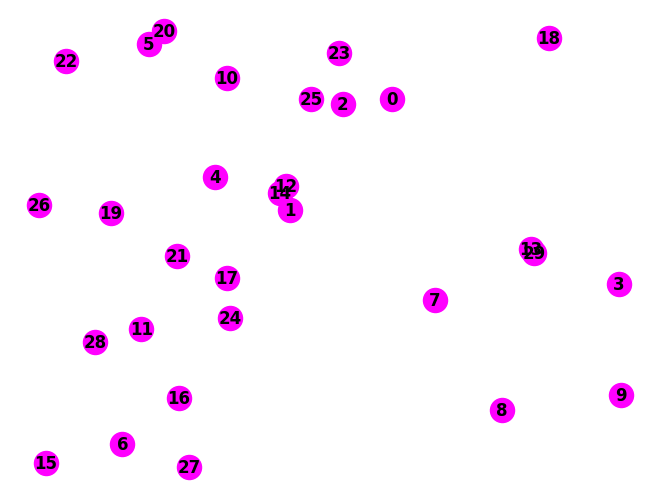

In [53]:

GraphExercise25(0.05, pos)

The simplicial complex admits 22 connected component(s).


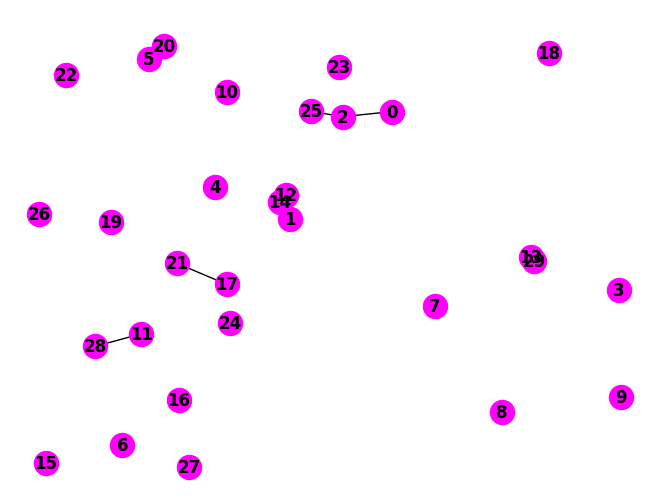

In [54]:
GraphExercise25(0.18, pos)

The simplicial complex admits 4 connected component(s).


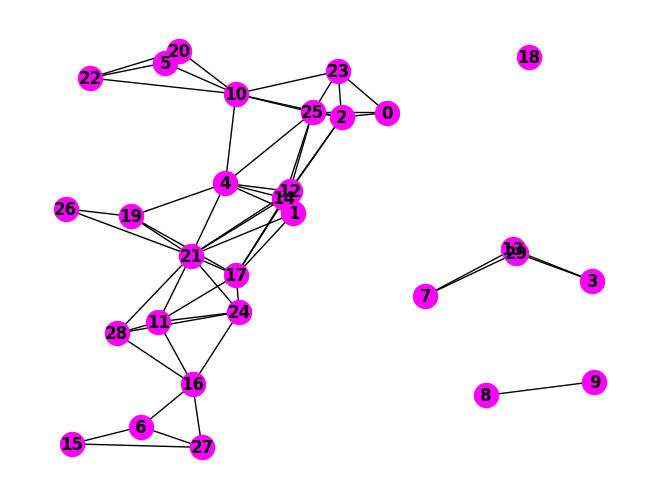

In [55]:
GraphExercise25(0.45, pos)

The simplicial complex admits 3 connected component(s).


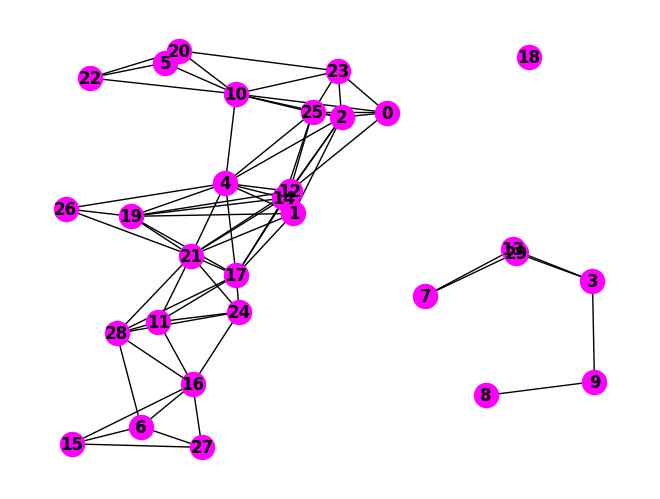

In [56]:
GraphExercise25(0.5, pos)

The simplicial complex admits 2 connected component(s).


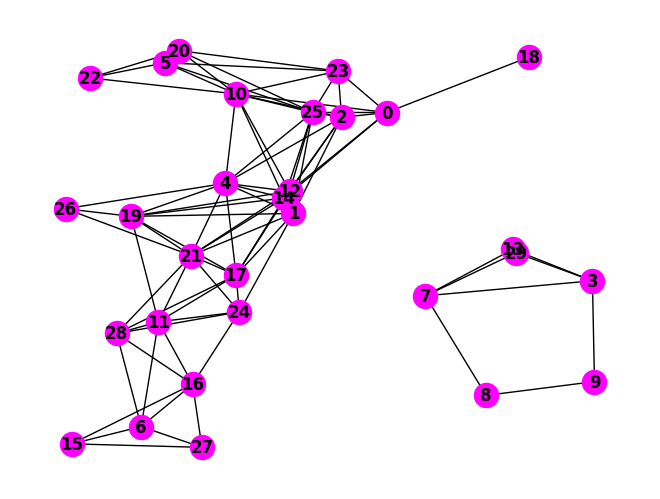

In [57]:
GraphExercise25(0.55, pos)

The simplicial complex admits 1 connected component(s).


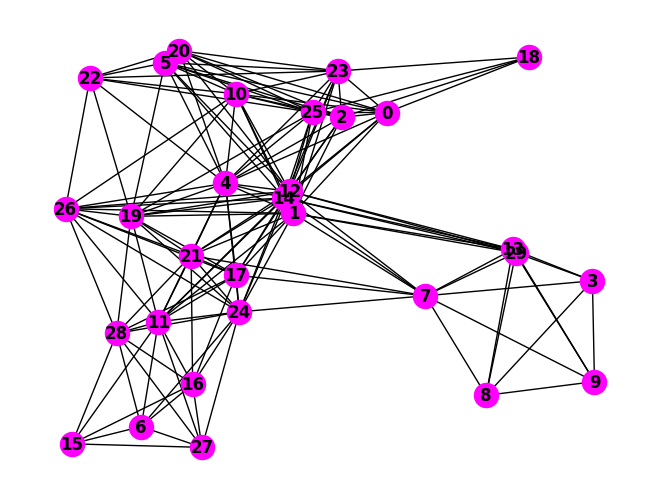

In [58]:
GraphExercise25(0.77, pos)

We observe that, as the value of r increases, the numbet of connected components decreases. The Number of Connected Components decreases in general because we are inserting more simplices into the complex


# Exercise 26

A *Erdős–Rényi random graph $\mathcal{G}(n,p)$* is a simplicial complex obtained as follows:
- add $n$ vertices $1,...,n$,
- add each edge $[a,b]$, where $a,b \in [1,n]$, to the complex with probability $p$.

Builds a function that, given $n$ and $p$, outputs a simplicial complex $\mathcal{G}(n,p)$.
Observe the influence of $p$ on the number of connected components of $\mathcal{G}(10,p)$ and $\mathcal{G}(100,p)$.

*Hint:* If $V$ is a list, `itertools.combinations(V,2)` can be used to generate all the non-ordered pairs `[a,b]` in `V` (package `itertools`).
The command `random.random()` can be used to generate a random number between 0 and 1, and `random.random()<p` is  `True` with probability  `p` (package `random`).

In [59]:
import itertools
import random

In [60]:
def GraphExercise26(n, p):
    """
    Constructs a random graph using the Erdős–Rényi model and analyzes its properties.

    The function initializes a simplicial complex, adds 'n' vertices,
    and then adds edges between pairs of vertices with probability 'p'.
    The graph is then visualized, and the Euler characteristic and
    number of connected components are displayed.

    Parameters:
    n (int): The number of vertices in the graph.
    p (float): The probability of adding an edge between any two vertices.

    Returns:
    None
    """
    # Generate a list of vertices
    V = list(range(n))

    # Initialize a simplicial complex using Gudhi's SimplexTree
    simpcomplex = gudhi.SimplexTree()

    # Add vertices to the simplicial complex
    for i in range(n):
        simpcomplex.insert([i])

    # Add edges based on the probability 'p'
    for v in itertools.combinations(V, 2):
        if random.random() < p:
            simpcomplex.insert(list(v))

    # Compute and display the Euler characteristic
    EulerCharacteristic(simpcomplex)

    # Display the number of connected components
    NumberOfConnectedComponents(simpcomplex)

    # Visualize the simplicial complex
    DrawSimplicialComplex(simpcomplex)




The simplicial complex has Euler characteristic equal to -3.
The simplicial complex admits 1 connected component(s).


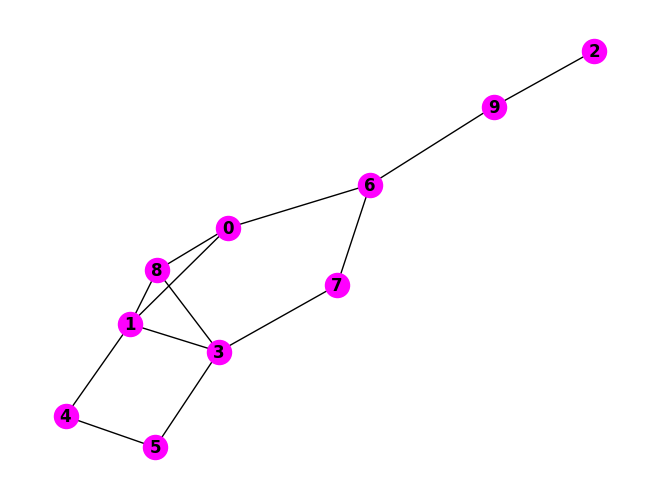

In [61]:
GraphExercise26(n=10,p=0.2)

The simplicial complex has Euler characteristic equal to -4.
The simplicial complex admits 1 connected component(s).


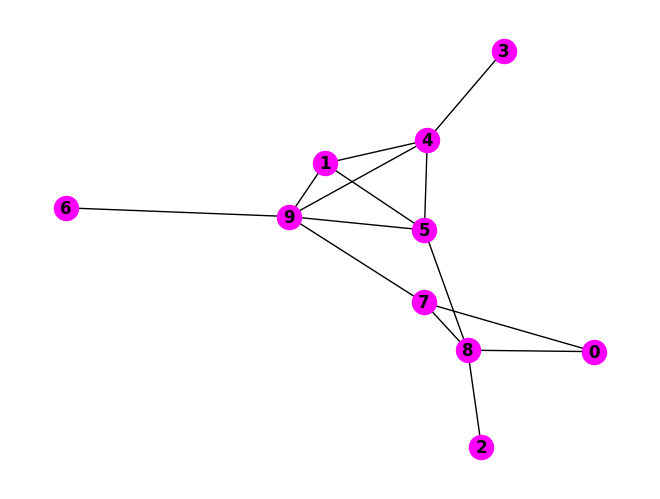

In [62]:
GraphExercise26(n=10,p=0.2)

The simplicial complex has Euler characteristic equal to -148.
The simplicial complex admits 3 connected component(s).


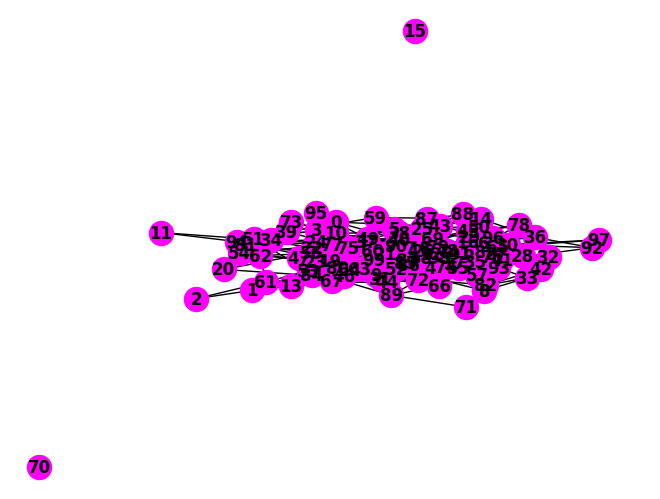

In [63]:
GraphExercise26(n=100,p=0.05)

<ipython-input-68-5ea34cdda539>:16: DeprecationWarning: Since Gudhi 3.2, calling SimplexTree.initialize_filtration is unnecessary.
  simplex_tree.initialize_filtration()


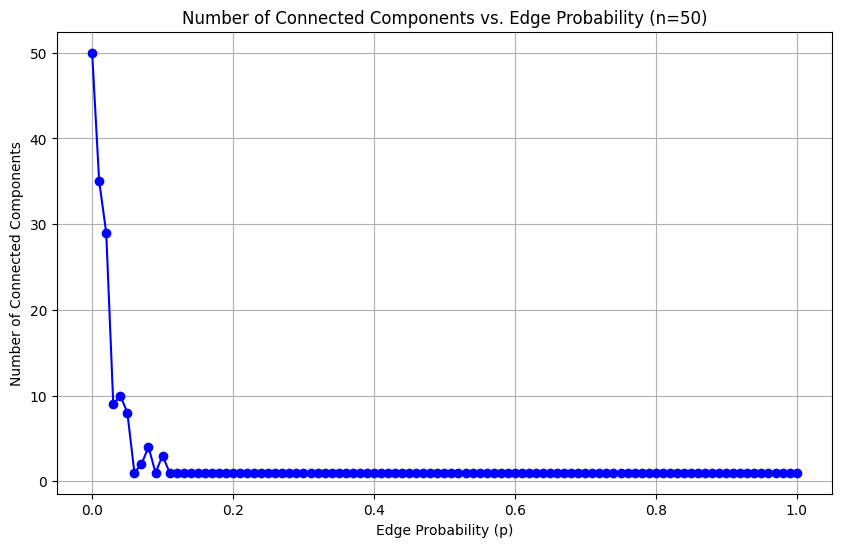

In [68]:
import itertools
import random
import matplotlib.pyplot as plt
import gudhi

def EulerCharacteristic(simpcomplex):
    # Calculate Euler characteristic: V - E + F - ...
    euler_char = 0
    for dim in range(simpcomplex.dimension() + 1):
        euler_char += (-1) ** dim * len([s for s in simpcomplex.get_skeleton(dim) if len(s[0]) == dim + 1])
    return euler_char

def NumberOfConnectedComponents(simpcomplex):
    # Use Gudhi's persistent homology to count connected components
    simplex_tree = simpcomplex
    simplex_tree.initialize_filtration()
    persistence = simplex_tree.persistence()

    # Find the number of connected components (H0 features with birth time 0)
    connected_components = len([d for d in persistence if d[0] == 0])
    return connected_components

def DrawSimplicialComplex(simpcomplex):
    print("Simplicial complex visualized.")
    # Visualization can be added if needed

def GraphExercise26(n, p):
    V = list(range(n))
    simpcomplex = gudhi.SimplexTree()

    for i in range(n):
        simpcomplex.insert([i])

    for v in itertools.combinations(V, 2):
        if random.random() < p:
            simpcomplex.insert(list(v))

    euler_char = EulerCharacteristic(simpcomplex)
    num_connected_components = NumberOfConnectedComponents(simpcomplex)

    DrawSimplicialComplex(simpcomplex)
    return num_connected_components

def PlotConnectedComponents(n, p_values):
    connected_components = []
    for p in p_values:
        num_components = GraphExercise26(n, p)
        connected_components.append(num_components)

    plt.figure(figsize=(10, 6))
    plt.plot(p_values, connected_components, marker='o', linestyle='-', color='b')
    plt.title(f'Number of Connected Components vs. Edge Probability (n={n})')
    plt.xlabel('Edge Probability (p)')
    plt.ylabel('Number of Connected Components')
    plt.grid(True)
    plt.show()

# Example usage:
n = 50  # Number of vertices
p_values = [i/100 for i in range(101)]  # Probabilities from 0.00 to 1.00
PlotConnectedComponents(n, p_values)


Conclusion:

The graph demonstrates how increasing edge probability significantly reduces the number of disconnected components, transitioning the graph from a fragmented structure to a unified, connected network.


Low Edge Probability (p < 0.1): The graph consists of many disconnected vertices and small clusters.

Moderate Edge Probability (0.1 ≤ p < 0.2): Rapid reduction in connected components as more edges form, linking isolated clusters.

High Edge Probability (p ≥ 0.2): The graph evolves into a single connected component, with vertices forming a large, interconnected network.

